In [ ]:
#Balance sheet to CSV
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='..../a.env')

vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=TSLA&apikey={vantage-key}'
r = requests.get(url)
data = r.json()

# Extract the balance sheet data
balance_sheet_data = data['annualReports']  # or 'quarterlyReports' for quarterly data

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate over each report and extract the desired data
for report in balance_sheet_data:
    report_data = {
        'Period': report['fiscalDateEnding'],
        'Current Assets': report['totalCurrentAssets'],
        'Current Liabilities': report['totalCurrentLiabilities'],
        'Inventory': report['inventory'],
        'Total Assets': report['totalAssets'],
        'Total Equity': report['totalShareholderEquity']
        
        
    }
    df = df.append(report_data, ignore_index=True)



# Save the DataFrame to a CSV file
df.to_csv("stock_balance_info.csv", index=False)


In [ ]:
#Income Statement to CSV
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='..../a.env')

vantage_key = os.environ['VANTAGE_KEY']


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=TSLA&apikey={vantage_key}'
r = requests.get(url)
data = r.json()

print(data)

# Extract the balance sheet data
balance_sheet_data = data['annualReports']  # or 'quarterlyReports' for quarterly data

# Create an empty DataFrame
df = pd.DataFrame(balance_sheet_data)

# Iterate over each report and extract the desired data
for report in balance_sheet_data:
    report_data = {
        'Period': report['fiscalDateEnding'],
        'Revenue': report['totalRevenue'],
        'Cost of Goods Sold': report['costofGoodsAndServicesSold'],
        'Net Income': report['netIncome']
    }
    df = df.append(report_data, ignore_index=True)

# Save the DataFrame to a CSV file
df.to_csv("new_income_info.csv", index=False)


Liquidity Ratios
Current Ratio: 1.53
Quick Ratio: 1.05

Profitability Ratios
Net Profit Margin: 15.41%
Return on Assets: 15.25%
Return on Equity: 28.09%

Activity Ratios
Asset Turnover: 0.99
Inventory Turnover: 0.05



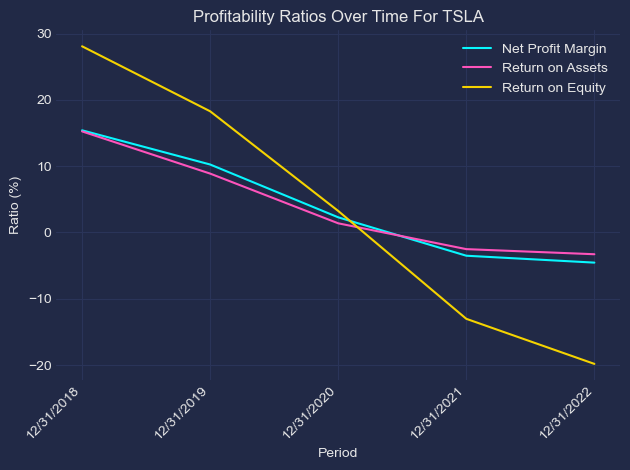

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.dates as mdates

plt.style.use("cyberpunk")

symbol = "TSLA"


def analyze_balance_sheet(csv_file):
    # Read the CSV file
    balance_sheet = pd.read_csv(csv_file)
    
    balance_sheet = balance_sheet.sort_values('Period', ascending=False)
    balance_sheet['Period'] = pd.to_datetime(balance_sheet['Period'])

    
    # Calculate liquidity ratios
    current_ratio = balance_sheet['Current Assets'] / balance_sheet['Current Liabilities']
    quick_ratio = (balance_sheet['Current Assets'] - balance_sheet['Inventory']) / balance_sheet['Current Liabilities']
    
    # Calculate profitability ratios
    net_profit_margin = (balance_sheet['Net Income'] / balance_sheet['Revenue']) * 100
    return_on_assets = (balance_sheet['Net Income'] / balance_sheet['Total Assets']) * 100
    return_on_equity = (balance_sheet['Net Income'] / balance_sheet['Total Equity']) * 100
    
    # Calculate activity ratios
    asset_turnover = balance_sheet['Revenue'] / balance_sheet['Total Assets']
    inventory_turnover = balance_sheet['Cost of Goods Sold'] / balance_sheet['Inventory']
    
    # Create a dictionary to store the ratios
    ratios = {
        'Liquidity Ratios': {
            'Current Ratio': current_ratio,
            'Quick Ratio': quick_ratio
        },
        'Profitability Ratios': {
            'Net Profit Margin': net_profit_margin,
            'Return on Assets': return_on_assets,
            'Return on Equity': return_on_equity
        },
        'Activity Ratios': {
            'Asset Turnover': asset_turnover,
            'Inventory Turnover': inventory_turnover
        }
    }
    
    return ratios


def print_ratios(ratios):
    for category, ratio_dict in ratios.items():
        print(category)
        for ratio_name, ratio_value in ratio_dict.items():
            ratio_value = ratio_value.iloc[0]  # Extract the value from the DataFrame
            
            if 'Margin' in ratio_name or 'Return' in ratio_name:
                ratio_value = f'{ratio_value:.2f}%'
            else:
                ratio_value = f'{ratio_value:.2f}'
            
            print(f'{ratio_name}: {ratio_value}')
        print()

def plot_ratios(ratios, balance_sheet):
    fig, ax = plt.subplots()
    
    # Extract the ratio values for plotting
    margin_values = ratios['Profitability Ratios']['Net Profit Margin']
    roa_values = ratios['Profitability Ratios']['Return on Assets']
    roe_values = ratios['Profitability Ratios']['Return on Equity']
    
    # Extract the 'Period' values from the balance_sheet DataFrame
    periods = balance_sheet['Period'].tolist()
    
    # Generate a range of x-axis values based on the number of ratios
    x_values = range(1, len(margin_values) + 1)
    
    # Plot the ratios
    ax.plot(x_values, margin_values, label='Net Profit Margin')
    ax.plot(x_values, roa_values, label='Return on Assets')
    ax.plot(x_values, roe_values, label='Return on Equity')
    
    # Set the plot labels and title
    ax.set_xlabel('Period')
    ax.set_ylabel('Ratio (%)')
    ax.set_title('Profitability Ratios Over Time For ' + symbol)
    
    # Set x-axis tick labels
    ax.set_xticks(x_values)
    ax.set_xticklabels(periods)  # Set the periods as x-axis tick labels
    
    # Rotate and align x-axis tick labels
    plt.xticks(rotation=45, ha='right')
    
    # Display the legend and show the plot
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    
    
def plot_ratios(ratios, balance_sheet):
    fig, ax = plt.subplots()
    
    # Extract the ratio values for plotting
    margin_values = ratios['Profitability Ratios']['Net Profit Margin']
    roa_values = ratios['Profitability Ratios']['Return on Assets']
    roe_values = ratios['Profitability Ratios']['Return on Equity']
    
    # Extract the 'Period' values from the balance_sheet DataFrame
    periods = balance_sheet['Period'].tolist()
    
    # Reverse the order of the 'periods' list to invert the x-axis
    periods = periods[::-1]
    
    # Generate a range of x-axis values based on the number of ratios
    x_values = range(1, len(margin_values) + 1)
    
    # Plot the ratios
    ax.plot(x_values, margin_values, label='Net Profit Margin')
    ax.plot(x_values, roa_values, label='Return on Assets')
    ax.plot(x_values, roe_values, label='Return on Equity')
    
    # Set the plot labels and title
    ax.set_xlabel('Period')
    ax.set_ylabel('Ratio (%)')
    ax.set_title('Profitability Ratios Over Time For ' + symbol)
    
    # Set x-axis tick labels
    ax.set_xticks(x_values)
    ax.set_xticklabels(periods)  # Set the inverted periods as x-axis tick labels
    
    # Rotate and align x-axis tick labels
    plt.xticks(rotation=45, ha='right')
    
    # Display the legend and show the plot
    ax.legend()
    plt.tight_layout()
    plt.show()


# Call the function and provide the 'ratios' dictionary and 'balance_sheet' DataFrame
ratios = analyze_balance_sheet('inputs\output_file.csv')
balance_sheet = pd.read_csv('inputs\output_file.csv')

# Print the calculated ratios
print_ratios(ratios)

# Plot the profitability ratios
plot_ratios(ratios, balance_sheet)

Liquidity Ratios
Current Ratio: 1.20
Quick Ratio: 1.06

Profitability Ratios
Net Profit Margin: -1.25%
Return on Assets: -0.77%
Return on Equity: -4.58%

Activity Ratios
Asset Turnover: 0.62
Inventory Turnover: 9.55



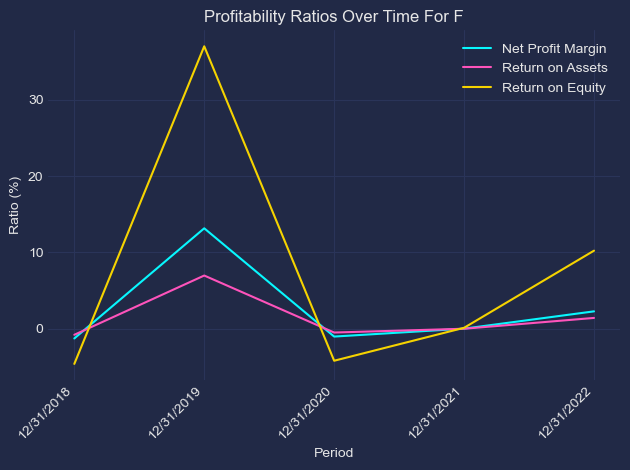

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.dates as mdates

plt.style.use("cyberpunk")

symbol = "F"


def analyze_balance_sheet(csv_file):
    # Read the CSV file
    balance_sheet = pd.read_csv(csv_file)
    
    balance_sheet = balance_sheet.sort_values('Period', ascending=False)
    balance_sheet['Period'] = pd.to_datetime(balance_sheet['Period'])

    
    # Calculate liquidity ratios
    current_ratio = balance_sheet['Current Assets'] / balance_sheet['Current Liabilities']
    quick_ratio = (balance_sheet['Current Assets'] - balance_sheet['Inventory']) / balance_sheet['Current Liabilities']
    
    # Calculate profitability ratios
    net_profit_margin = (balance_sheet['Net Income'] / balance_sheet['Revenue']) * 100
    return_on_assets = (balance_sheet['Net Income'] / balance_sheet['Total Assets']) * 100
    return_on_equity = (balance_sheet['Net Income'] / balance_sheet['Total Equity']) * 100
    
    # Calculate activity ratios
    asset_turnover = balance_sheet['Revenue'] / balance_sheet['Total Assets']
    inventory_turnover = balance_sheet['Cost of Goods Sold'] / balance_sheet['Inventory']
    
    # Create a dictionary to store the ratios
    ratios = {
        'Liquidity Ratios': {
            'Current Ratio': current_ratio,
            'Quick Ratio': quick_ratio
        },
        'Profitability Ratios': {
            'Net Profit Margin': net_profit_margin,
            'Return on Assets': return_on_assets,
            'Return on Equity': return_on_equity
        },
        'Activity Ratios': {
            'Asset Turnover': asset_turnover,
            'Inventory Turnover': inventory_turnover
        }
    }
    
    return ratios


def print_ratios(ratios):
    for category, ratio_dict in ratios.items():
        print(category)
        for ratio_name, ratio_value in ratio_dict.items():
            ratio_value = ratio_value.iloc[0]  # Extract the value from the DataFrame
            
            if 'Margin' in ratio_name or 'Return' in ratio_name:
                ratio_value = f'{ratio_value:.2f}%'
            else:
                ratio_value = f'{ratio_value:.2f}'
            
            print(f'{ratio_name}: {ratio_value}')
        print()

def plot_ratios(ratios, balance_sheet):
    fig, ax = plt.subplots()
    
    # Extract the ratio values for plotting
    margin_values = ratios['Profitability Ratios']['Net Profit Margin']
    roa_values = ratios['Profitability Ratios']['Return on Assets']
    roe_values = ratios['Profitability Ratios']['Return on Equity']
    
    # Extract the 'Period' values from the balance_sheet DataFrame
    periods = balance_sheet['Period'].tolist()
    
    # Generate a range of x-axis values based on the number of ratios
    x_values = range(1, len(margin_values) + 1)
    
    # Plot the ratios
    ax.plot(x_values, margin_values, label='Net Profit Margin')
    ax.plot(x_values, roa_values, label='Return on Assets')
    ax.plot(x_values, roe_values, label='Return on Equity')
    
    # Set the plot labels and title
    ax.set_xlabel('Period')
    ax.set_ylabel('Ratio (%)')
    ax.set_title('Profitability Ratios Over Time For $F')
    
    # Set x-axis tick labels
    ax.set_xticks(x_values)
    ax.set_xticklabels(periods)  # Set the periods as x-axis tick labels
    
    # Rotate and align x-axis tick labels
    plt.xticks(rotation=45, ha='right')
    
    # Display the legend and show the plot
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    
    
def plot_ratios(ratios, balance_sheet):
    fig, ax = plt.subplots()
    
    # Extract the ratio values for plotting
    margin_values = ratios['Profitability Ratios']['Net Profit Margin']
    roa_values = ratios['Profitability Ratios']['Return on Assets']
    roe_values = ratios['Profitability Ratios']['Return on Equity']
    
    # Extract the 'Period' values from the balance_sheet DataFrame
    periods = balance_sheet['Period'].tolist()
    
    # Reverse the order of the 'periods' list to invert the x-axis
    periods = periods[::-1]
    
    # Generate a range of x-axis values based on the number of ratios
    x_values = range(1, len(margin_values) + 1)
    
    # Plot the ratios
    ax.plot(x_values, margin_values, label='Net Profit Margin')
    ax.plot(x_values, roa_values, label='Return on Assets')
    ax.plot(x_values, roe_values, label='Return on Equity')
    
    # Set the plot labels and title
    ax.set_xlabel('Period')
    ax.set_ylabel('Ratio (%)')
    ax.set_title('Profitability Ratios Over Time For ' + symbol)
    
    # Set x-axis tick labels
    ax.set_xticks(x_values)
    ax.set_xticklabels(periods)  # Set the inverted periods as x-axis tick labels
    
    # Rotate and align x-axis tick labels
    plt.xticks(rotation=45, ha='right')
    
    # Display the legend and show the plot
    ax.legend()
    plt.tight_layout()
    plt.show()


# Call the function and provide the 'ratios' dictionary and 'balance_sheet' DataFrame
ratios = analyze_balance_sheet('inputs\output_file.csv')
balance_sheet = pd.read_csv('inputs\output_file.csv')

# Print the calculated ratios
print_ratios(ratios)

# Plot the profitability ratios
plot_ratios(ratios, balance_sheet)

In [18]:
import requests
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='..../a.env')

vantage_key = os.environ['VANTAGE_KEY']


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=MARKET_STATUS&apikey={vantage_key}'
r = requests.get(url)
data = r.json()

print(data)

{'endpoint': 'Global Market Open & Close Status', 'markets': [{'market_type': 'Equity', 'region': 'United States', 'primary_exchanges': 'NASDAQ, NYSE, AMEX, BATS', 'local_open': '09:30', 'local_close': '16:15', 'current_status': 'closed', 'notes': ''}, {'market_type': 'Equity', 'region': 'Canada', 'primary_exchanges': 'Toronto, Toronto Ventures', 'local_open': '09:30', 'local_close': '16:00', 'current_status': 'closed', 'notes': ''}, {'market_type': 'Equity', 'region': 'United Kingdom', 'primary_exchanges': 'London', 'local_open': '08:00', 'local_close': '16:30', 'current_status': 'closed', 'notes': ''}, {'market_type': 'Equity', 'region': 'Germany', 'primary_exchanges': 'XETRA, Berlin, Frankfurt, Munich, Stuttgart', 'local_open': '08:00', 'local_close': '20:00', 'current_status': 'closed', 'notes': ''}, {'market_type': 'Equity', 'region': 'France', 'primary_exchanges': 'Paris', 'local_open': '09:00', 'local_close': '17:30', 'current_status': 'closed', 'notes': ''}, {'market_type': 'Eq